### 1: AVG number of blocked URls per filterlist

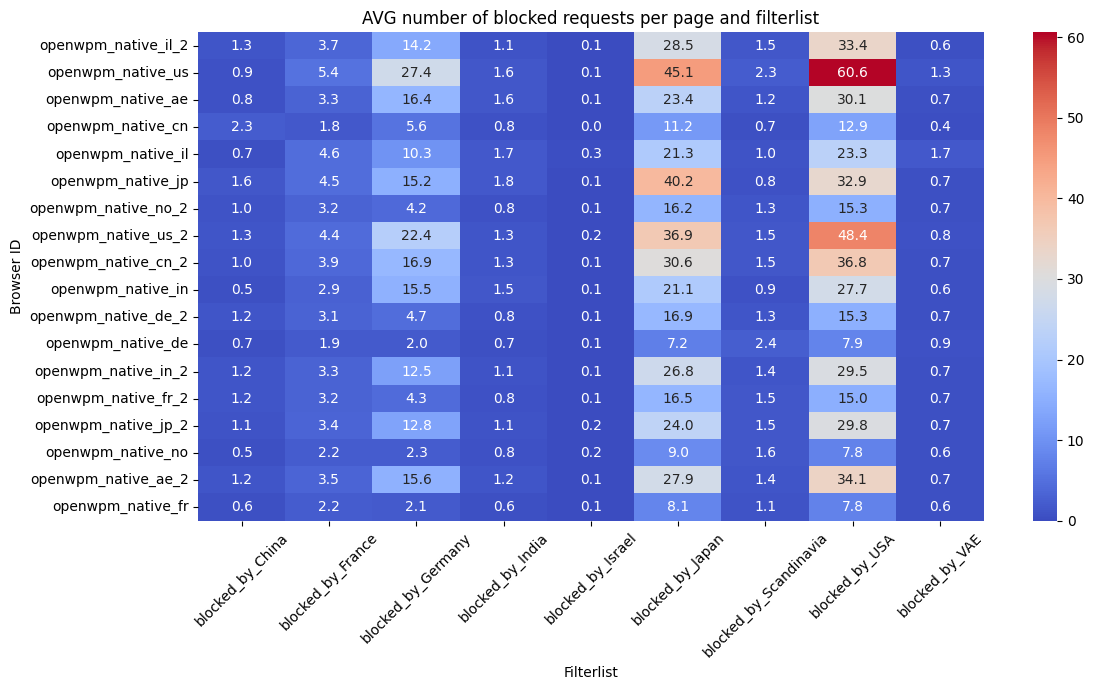

'\n-- SQL Query:\n\n select  browser_id,\n AVG(blocked_by_China) blocked_by_China,\n  AVG(blocked_by_France) blocked_by_France,\n  AVG(blocked_by_Germany) blocked_by_Germany,\n  AVG(blocked_by_India) blocked_by_India,\n  AVG(blocked_by_Israel) blocked_by_Israel,\n  AVG(blocked_by_Japan) blocked_by_Japan,\n  AVG(blocked_by_Scandinavia) blocked_by_Scandinavia,\n  AVG(blocked_by_USA) blocked_by_USA,\n  AVG(blocked_by_VAE) blocked_by_VAE,\nfrom(\n\nSELECT\n  blocked_by_China/ct_requests as blocked_by_China,\n  blocked_by_France/ct_requests as blocked_by_France,\n  blocked_by_Germany/ct_requests as blocked_by_Germany,\n  blocked_by_India/ct_requests as blocked_by_India,\n  blocked_by_Israel/ct_requests as blocked_by_Israel,\n  blocked_by_Japan/ct_requests as blocked_by_Japan,\n  blocked_by_Scandinavia/ct_requests as blocked_by_Scandinavia,\n  blocked_by_USA/ct_requests as blocked_by_USA,\n  blocked_by_VAE/ct_requests as blocked_by_VAE,\n  browser_id\nFROM (\n  SELECT\n    visit_id,\n    bro

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = os.getcwd() + "/data/" + "number_of_blocked_requests.csv" 
data = pd.read_csv(file_path)

data.set_index("browser_id", inplace=True)



# Creating the heatmap

plt.figure(figsize=(12, 7))
sns.heatmap(data, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("AVG number of blocked requests per page and filterlist")
plt.xlabel("Filterlist")
plt.ylabel("Browser ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"""
-- SQL Query:

 select  browser_id,
 AVG(blocked_by_China) blocked_by_China,
  AVG(blocked_by_France) blocked_by_France,
  AVG(blocked_by_Germany) blocked_by_Germany,
  AVG(blocked_by_India) blocked_by_India,
  AVG(blocked_by_Israel) blocked_by_Israel,
  AVG(blocked_by_Japan) blocked_by_Japan,
  AVG(blocked_by_Scandinavia) blocked_by_Scandinavia,
  AVG(blocked_by_USA) blocked_by_USA,
  AVG(blocked_by_VAE) blocked_by_VAE,
from(

SELECT
  blocked_by_China/ct_requests as blocked_by_China,
  blocked_by_France/ct_requests as blocked_by_France,
  blocked_by_Germany/ct_requests as blocked_by_Germany,
  blocked_by_India/ct_requests as blocked_by_India,
  blocked_by_Israel/ct_requests as blocked_by_Israel,
  blocked_by_Japan/ct_requests as blocked_by_Japan,
  blocked_by_Scandinavia/ct_requests as blocked_by_Scandinavia,
  blocked_by_USA/ct_requests as blocked_by_USA,
  blocked_by_VAE/ct_requests as blocked_by_VAE,
  browser_id
FROM (
  SELECT
    visit_id,
    browser_id,
    COUNTIF(filterlist_China_is_blocked) AS blocked_by_China,
    COUNTIF(filterlist_France_is_blocked) AS blocked_by_France,
    COUNTIF(filterlist_Germany_is_blocked) AS blocked_by_Germany,
    COUNTIF(filterlist_Indian_is_blocked) AS blocked_by_India,
    COUNTIF(filterlist_Israel_is_blocked) AS blocked_by_Israel,
    COUNTIF(filterlist_Japanese_is_blocked) AS blocked_by_Japan,
    COUNTIF(filterlist_Scandinavia_is_blocked) AS blocked_by_Scandinavia,
    COUNTIF(filterlist_USA_is_blocked) AS blocked_by_USA,
    COUNTIF(filterlist_VAE_is_blocked) AS blocked_by_VAE,
    (
    SELECT
      COUNT(*)
    FROM
      measurement.requests r2
    WHERE
      r2.visit_id=r.visit_id
      AND r2.browser_id = r.browser_id) ct_requests,
  FROM
    measurement.requests r
  GROUP BY
    visit_id,
    browser_id))
    GROUP BY
    browser_id
    """


## Fraction of blocked URLs per filterlist

SQL .

```
SELECT
  browser_id,
  ROUND(AVG(blocked_by_China)*100,1) China,
  ROUND(AVG(blocked_by_France)*100,1) France,
  ROUND( AVG(blocked_by_Germany)*100,1) Germany,
  ROUND( AVG(blocked_by_India)*100,1) India,
  ROUND( AVG(blocked_by_Israel)*100,1) Israel,
  ROUND( AVG(blocked_by_Japan)*100,1) Japan,
  ROUND( AVG(blocked_by_Scandinavia)*100,1) Scandinavia,
  ROUND( AVG(blocked_by_USA)*100,1) USA,
  ROUND( AVG(blocked_by_VAE)*100,1) VAE,
FROM (
  SELECT
    blocked_by_China/ct_requests AS blocked_by_China,
    blocked_by_France/ct_requests AS blocked_by_France,
    blocked_by_Germany/ct_requests AS blocked_by_Germany,
    blocked_by_India/ct_requests AS blocked_by_India,
    blocked_by_Israel/ct_requests AS blocked_by_Israel,
    blocked_by_Japan/ct_requests AS blocked_by_Japan,
    blocked_by_Scandinavia/ct_requests AS blocked_by_Scandinavia,
    blocked_by_USA/ct_requests AS blocked_by_USA,
    blocked_by_VAE/ct_requests AS blocked_by_VAE,
    measurement.get_browser_name(browser_id) browser_id
  FROM (
    SELECT
      visit_id,
      browser_id,
      COUNTIF(filterlist_China_is_blocked) AS blocked_by_China,
      COUNTIF(filterlist_France_is_blocked) AS blocked_by_France,
      COUNTIF(filterlist_Germany_is_blocked) AS blocked_by_Germany,
      COUNTIF(filterlist_Indian_is_blocked) AS blocked_by_India,
      COUNTIF(filterlist_Israel_is_blocked) AS blocked_by_Israel,
      COUNTIF(filterlist_Japanese_is_blocked) AS blocked_by_Japan,
      COUNTIF(filterlist_Scandinavia_is_blocked) AS blocked_by_Scandinavia,
      COUNTIF(filterlist_USA_is_blocked) AS blocked_by_USA,
      COUNTIF(filterlist_VAE_is_blocked) AS blocked_by_VAE,
      (
      SELECT
        COUNT(*)
      FROM
        measurement.requests r2
      WHERE
        r2.visit_id=r.visit_id
        AND r2.browser_id = r.browser_id) ct_requests,
    FROM
      measurement.requests r
    GROUP BY
      visit_id,
      browser_id))
GROUP BY
  browser_id order by browser_id
```

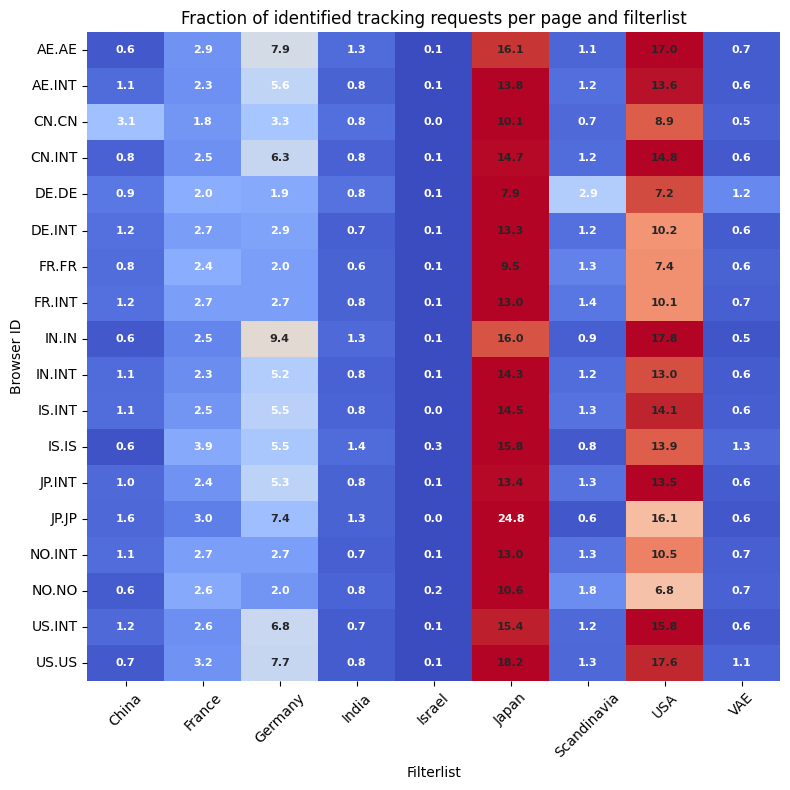

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

file_path = os.getcwd() + "/data/" + "fraction_of_blocked_requests.csv" 
data = pd.read_csv(file_path)

data.set_index("browser_id", inplace=True)

scaler = MinMaxScaler()

def normalize_colors(data):
    normalized_data = pd.DataFrame(index=data.index, columns=data.columns)
    
    for index, row in data.iterrows():
        normalized_data.loc[index] = scaler.fit_transform(row.values.reshape(-1, 1)).flatten()
    return normalized_data

data_colors = normalize_colors(data)

plt.figure(figsize=(8,8))

sns.heatmap(data, annot=True, fmt=".1f", cmap="coolwarm", cbar=False, 
            linewidths=0.5, linecolor='grey', mask=data_colors.isnull(), 
            norm=None, vmin=0, vmax=1,
            annot_kws={"size": 8, "weight": "bold"},
            cbar_kws={"orientation": "horizontal", "pad": 0.05})

for index, row in data.iterrows():
    for col in data.columns:
        plt.gca().add_patch(plt.Rectangle((list(data.columns).index(col), list(data.index).index(index)),
                                          1, 1, fill=True, color=plt.cm.coolwarm(data_colors.loc[index, col]), 
                                          transform=plt.gca().transData, linewidth=0))

plt.subplots_adjust(bottom=0.2, top=0.9, wspace=0.0)  

plt.title("Fraction of identified tracking requests per page and filterlist")
plt.xlabel("Filterlist")
plt.ylabel("Browser ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# du sagst  Israel's local profile (IS.IS) identifies 15.8% of tracking requests, compared to 14.5% identified by the international profile (IS.INT). 

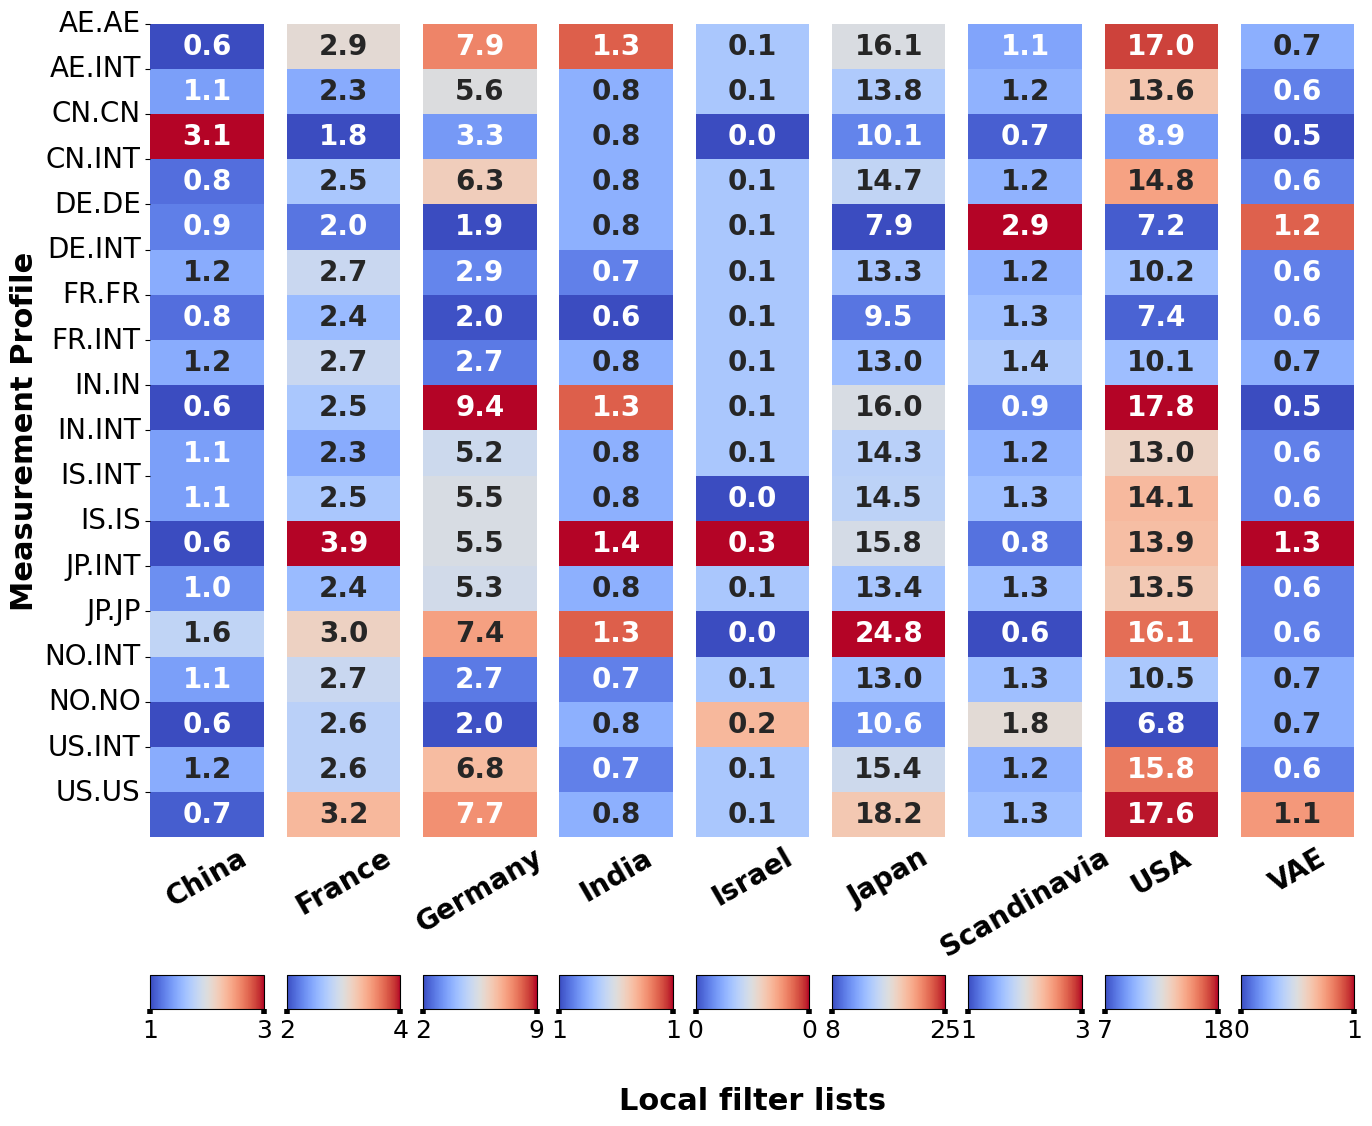

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Load the data
file_path = 'Code/Analysis/data/fraction_of_blocked_requests.csv'
data = pd.read_csv(file_path)
data.set_index("browser_id", inplace=True)

# Normalize each column
normalized_data = data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

# Define the figure size based on the number of columns
fig_width = 14  
fig_height = 14  
n_cols = data.shape[1]

# Create a GridSpec layout with an extra row for colorbars
fig = plt.figure(figsize=(fig_width, fig_height))
gs = GridSpec(2, n_cols, height_ratios=[1, 0.2], hspace=0.15)  

# Font properties
font_size = 20
font_weight = 'bold'

# Draw heatmaps and colorbars
axes = []
colorbar_axes = []

for i, col in enumerate(data.columns):
    ax = plt.subplot(gs[0, i])
    heatmap = sns.heatmap(data[[col]], annot=True, fmt=".1f", cmap="coolwarm", cbar=False, ax=ax, annot_kws={"size": font_size, "weight": font_weight})
    
    # Create a colorbar below the heatmap
    cbar_ax = plt.subplot(gs[1, i])
    cbar = plt.colorbar(heatmap.collections[0], cax=cbar_ax, orientation='horizontal')
    
    min_val = data[col].min()
    max_val = data[col].max()
    
    min_val_rounded = round(min_val)
    max_val_rounded = round(max_val)
    
    # Set colorbar ticks and labels
    cbar.set_ticks([min_val, max_val])
    cbar.set_ticklabels([str(min_val_rounded), str(max_val_rounded)])
    
    # Customize colorbar appearance
    cbar.ax.tick_params(labelsize=18)  # Set the font size of the color bar ticks to 15
    cbar.ax.xaxis.set_tick_params(labelsize=18, width=4)  # Increase the font size and width
    cbar.ax.xaxis.label.set_weight('bold')  # Set the weight to bold for the labels
    cbar.ax.set_box_aspect(0.3)  # Adjust the aspect ratio here to make the colorbar narrower

    ax.set_title('')
    if i == 0:
        ax.set_ylabel('Measurement Profile', fontsize=font_size+2, fontweight=font_weight) 
        ax.set_yticks(range(0,18))
        ax.set_yticklabels(data.index, fontsize=font_size-2, ha='right')
        ax.tick_params(left=True)
        ax.yaxis.set_tick_params(labelsize=font_size)
    else:
        ax.set_ylabel('')
   
        ax.set_yticks([])  # Hide y-ticks
        ax.tick_params(left=False, labelsize=font_size)  
        ax.yaxis.set_tick_params(labelsize=0)  # Ensure y-tick labels are hidden
        
    ax.set_xlabel('')
    ax.set_xticks([]) 
   
    
    axes.append(ax)
    colorbar_axes.append(cbar_ax)

for ax, col in zip(axes, data.columns):
    ax.set_xlabel(col, rotation=30, ha='center', fontsize=font_size, fontweight=font_weight)
    

fig.text(0.5, 0.13, 'Local filter lists', ha='center', va='center', fontsize=font_size+2, fontweight=font_weight)  # Adjust the vertical position

plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.15, wspace=0.2, hspace=0.2)

plt.savefig("./plots/p4.3.1_fraction_of_identified_tracking_requests.pdf", bbox_inches='tight', pad_inches=0.1)

plt.show()


In [ ]:
file_path = os.getcwd() + "/data/fraction_of_blocked_requests.csv"
data = pd.read_csv(file_path)
data.set_index("browser_id", inplace=True)

for col in data.columns:
    print("die ergebnisse für filterlist je nach land" + col)
    print(data[col])

# Statistical tests

### S1 - Effect of different filter lists on the number of tracking requests

In [ ]:
from scipy.stats import f_oneway
import os
import pandas as pd

file_path = os.getcwd() + "/data/" + "number_of_blocked_requests_per_page.csv" 
data = pd.read_csv(file_path)
 
 
# Performing Repeated Measures ANOVA
anova_results = f_oneway(
    data['blocked_by_China'], data['blocked_by_France'], data['blocked_by_Germany'], 
    data['blocked_by_India'], data['blocked_by_Israel'], data['blocked_by_Japan'], 
    data['blocked_by_Scandinavia'], data['blocked_by_USA'], data['blocked_by_VAE']
)

anova_results


### S2 - Effect size 

In [ ]:
# filter lists related with baseline CN, IN, DE, NO, AE
# Independed fitler lists: JP, FR, AE


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

# Load the dataset
file_path = os.path.join(os.getcwd(), "data", "number_of_blocked_requests_per_page.csv")
data = pd.read_csv(file_path)

# List of filter lists to include in the calculation
filter_lists_adjusted = ['blocked_by_Japan', 'blocked_by_France', 'blocked_by_VAE', 'blocked_by_China', 'blocked_by_India', 'blocked_by_Germany', 'blocked_by_Scandinavia', 'blocked_by_Israel']
filter_lists_kept = []

# Calculate Real Identified Tracking Numbers
adjusted_tracking = pd.DataFrame()

for filter_list in filter_lists_adjusted:
    adjusted_tracking[filter_list] = data['blocked_by_USA'] + data[filter_list]

for filter_list in filter_lists_kept:
    adjusted_tracking[filter_list] = data[filter_list]

adjusted_tracking['blocked_by_USA'] = data['blocked_by_USA']

# Calculate Mean Difference
mean_differences = {}
for filter_list in filter_lists_adjusted + filter_lists_kept:
    mean_differences[filter_list] = np.mean(adjusted_tracking[filter_list] - data['blocked_by_USA'])

# Calculate Percentage Change
percentage_changes = {}
for filter_list in filter_lists_adjusted + filter_lists_kept:
    non_zero_baseline = data['blocked_by_USA'] != 0
    percentage_change = np.mean(
        (adjusted_tracking[filter_list][non_zero_baseline] - data['blocked_by_USA'][non_zero_baseline]) / 
        data['blocked_by_USA'][non_zero_baseline]
    ) * 100
    
    # Ensure the direction of percentage change matches the mean difference
    if mean_differences[filter_list] < 0 and percentage_change > 0:
        percentage_change = -percentage_change
    elif mean_differences[filter_list] > 0 and percentage_change < 0:
        percentage_change = -percentage_change
    
    percentage_changes[filter_list] = percentage_change

# Prepare the results in a DataFrame
effect_size_results = pd.DataFrame({
    'Filter List': filter_lists_adjusted + filter_lists_kept,
    'Mean Difference': [mean_differences[fl] for fl in filter_lists_adjusted + filter_lists_kept],
    'Percentage Change (%)': [percentage_changes[fl] for fl in filter_lists_adjusted + filter_lists_kept]
})

# Display the results
print(effect_size_results)


sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(12,3))

# Bar plot for Mean Difference
barplot = sns.barplot(x='Filter List', y='Mean Difference', data=effect_size_results, ax=ax1, color='gray', label='Mean Difference')

# Line plot for Percentage Change
ax2 = ax1.twinx()
lineplot = sns.lineplot(x='Filter List', y='Percentage Change (%)', data=effect_size_results, ax=ax2, color='black', marker='o')

# Set labels
ax1.set_ylabel('Mean Difference', color='black', fontsize=16, fontweight='bold')
ax2.set_ylabel('Percentage Change (%)', color='black', fontsize=16, fontweight='bold')
ax1.set_xlabel('Local Filter Lists', fontsize=18, fontweight='bold')

# Adjust y-axis limits to remove negative values
ax1.set_ylim(0, 60)
ax2.set_ylim(0, 50)

# Set y-ticks
ax1.set_yticks([0, 25, 50, 100])
ax2.set_yticks([0, 25, 50, 100,180])
 
effect_size_results['Filter List'] = effect_size_results['Filter List'].str.replace('blocked_by_', '')

# Set x-tick labels
ax1.set_xticklabels(effect_size_results['Filter List'], rotation=25, ha='center', fontsize=16, fontweight='bold')

# Remove gridlines for clarity
ax1.grid(False)
ax2.grid(False)


ax1.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)


# Create legend
barplot_handle = plt.Line2D([], [], color='gray', linewidth=10, label='Mean Difference')
lineplot_handle = plt.Line2D([], [], color='black', marker='o', markersize=8, label='Percentage Change (%)')
ax1.legend(handles=[barplot_handle, lineplot_handle], loc='upper right', fontsize=15)
 

# Show and save plot
plt.savefig("./plots/p4.3.3_mean_difference_and_percentage_change.pdf")
plt.show()

# Display the results again for clarity
effect_size_results


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

# Load the dataset
file_path = os.path.join(os.getcwd(), "data", "number_of_blocked_requests_per_page.csv")
data = pd.read_csv(file_path)

# List of filter lists to include in the calculation
filter_lists_adjusted = ['blocked_by_Japan', 'blocked_by_France', 'blocked_by_VAE', 'blocked_by_China', 'blocked_by_India', 'blocked_by_Germany', 'blocked_by_Scandinavia', 'blocked_by_Israel']
filter_lists_kept = []

# Calculate Real Identified Tracking Numbers
adjusted_tracking = pd.DataFrame()

for filter_list in filter_lists_adjusted:
    adjusted_tracking[filter_list] = data['blocked_by_USA'] + data[filter_list]

for filter_list in filter_lists_kept:
    adjusted_tracking[filter_list] = data[filter_list]

adjusted_tracking['blocked_by_USA'] = data['blocked_by_USA']

# Calculate Mean Difference
mean_differences = {}
for filter_list in filter_lists_adjusted + filter_lists_kept:
    mean_differences[filter_list] = np.mean(adjusted_tracking[filter_list] - data['blocked_by_USA'])

# Calculate Percentage Change
percentage_changes = {}
for filter_list in filter_lists_adjusted + filter_lists_kept:
    non_zero_baseline = data['blocked_by_USA'] != 0
    percentage_change = np.mean(
        (adjusted_tracking[filter_list][non_zero_baseline] - data['blocked_by_USA'][non_zero_baseline]) / 
        data['blocked_by_USA'][non_zero_baseline]
    ) * 100
    
    # Ensure the direction of percentage change matches the mean difference
    if mean_differences[filter_list] < 0 and percentage_change > 0:
        percentage_change = -percentage_change
    elif mean_differences[filter_list] > 0 and percentage_change < 0:
        percentage_change = -percentage_change
    
    percentage_changes[filter_list] = percentage_change

# Prepare the results in a DataFrame
effect_size_results = pd.DataFrame({
    'Filter List': filter_lists_adjusted + filter_lists_kept,
    'Mean Difference': [mean_differences[fl] for fl in filter_lists_adjusted + filter_lists_kept],
    'Percentage Change (%)': [percentage_changes[fl] for fl in filter_lists_adjusted + filter_lists_kept]
})

# Display the results
print(effect_size_results)

sns.set(style="whitegrid")

# Adjust the figure size
fig, ax1 = plt.subplots(figsize=(14,6.2))

# Bar plot for Mean Difference
barplot = sns.barplot(x='Filter List', y='Mean Difference', data=effect_size_results, ax=ax1, color='gray', label='Mean Difference', ci=None, linewidth=1)

# Line plot for Percentage Change
ax2 = ax1.twinx()
lineplot = sns.lineplot(x='Filter List', y='Percentage Change (%)', data=effect_size_results, ax=ax2, color='black', marker='o', linewidth=2.5)

# Set labels
ax1.set_ylabel('Mean Difference', color='black', fontsize=27, fontweight='bold')
ax2.set_ylabel('Percentage Change (%)', color='black', fontsize=27, fontweight='bold')
ax1.set_xlabel('Local Filter Lists', fontsize=27, fontweight='bold')


ax1.tick_params(axis='y', labelsize=28)
ax2.tick_params(axis='y', labelsize=28)

# Adjust y-axis limits to remove negative values
ax1.set_ylim(0, 120)  # Adjusted the upper limit for better visibility
ax2.set_ylim(0, 180)  # Adjusted the upper limit for better visibility

# Set y-ticks
ax1.set_yticks([0, 25, 50, 75, 100])
ax2.set_yticks([0, 50, 100, 150, 180])


effect_size_results['Filter List'] = effect_size_results['Filter List'].str.replace('blocked_by_', '')

# Set x-tick labels
ax1.set_xticklabels(effect_size_results['Filter List'], rotation=30, ha='center', fontsize=30, fontweight='bold')

# Remove gridlines for clarity
ax1.grid(False)
ax2.grid(False)

# Create legend
barplot_handle = plt.Line2D([], [], color='gray', linewidth=10, label='Mean Difference')
lineplot_handle = plt.Line2D([], [], color='black', marker='o', markersize=8, linewidth=2.5, label='Percentage Change (%)')
ax1.legend(handles=[barplot_handle, lineplot_handle], loc='upper right', fontsize=22) 
plt.tight_layout()

plt.savefig("./plots/p4.3.3_mean_difference_and_percentage_change.pdf")
plt.show()

# Display the results again for clarity
effect_size_results


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import ttest_ind

# Load the dataset
file_path = os.path.join(os.getcwd(), "data", "number_of_blocked_requests_per_page.csv")
data = pd.read_csv(file_path)

# List of filter lists to include in the calculation
filter_lists_adjusted = ['blocked_by_Japan', 'blocked_by_France', 'blocked_by_VAE', 'blocked_by_China', 'blocked_by_India', 'blocked_by_Germany', 'blocked_by_Scandinavia', 'blocked_by_Israel']
filter_lists_kept = []

# Calculate Real Identified Tracking Numbers
adjusted_tracking = pd.DataFrame()

for filter_list in filter_lists_adjusted:
    adjusted_tracking[filter_list] = data['blocked_by_USA'] + data[filter_list]

for filter_list in filter_lists_kept:
    adjusted_tracking[filter_list] = data[filter_list]

adjusted_tracking['blocked_by_USA'] = data['blocked_by_USA']

# Calculate Mean Difference
mean_differences = {}
for filter_list in filter_lists_adjusted + filter_lists_kept:
    mean_differences[filter_list] = np.mean(adjusted_tracking[filter_list] - data['blocked_by_USA'])

# Calculate Percentage Change
percentage_changes = {}
for filter_list in filter_lists_adjusted + filter_lists_kept:
    non_zero_baseline = data['blocked_by_USA'] != 0
    percentage_change = np.mean(
        (adjusted_tracking[filter_list][non_zero_baseline] - data['blocked_by_USA'][non_zero_baseline]) / 
        data['blocked_by_USA'][non_zero_baseline]
    ) * 100
    
    # Ensure the direction of percentage change matches the mean difference
    if mean_differences[filter_list] < 0 and percentage_change > 0:
        percentage_change = -percentage_change
    elif mean_differences[filter_list] > 0 and percentage_change < 0:
        percentage_change = -percentage_change
    
    percentage_changes[filter_list] = percentage_change

# Calculate Effect Size (Cohen's d)
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1) * np.var(x) + (ny - 1) * np.var(y)) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

effect_sizes = {}
for filter_list in filter_lists_adjusted + filter_lists_kept:
    effect_sizes[filter_list] = cohen_d(adjusted_tracking[filter_list], data['blocked_by_USA'])

# Prepare the results in a DataFrame
effect_size_results = pd.DataFrame({
    'Filter List': filter_lists_adjusted + filter_lists_kept,
    'Mean Difference': [mean_differences[fl] for fl in filter_lists_adjusted + filter_lists_kept],
    'Percentage Change (%)': [percentage_changes[fl] for fl in filter_lists_adjusted + filter_lists_kept],
    'Effect Size (Cohen\'s d)': [effect_sizes[fl] for fl in filter_lists_adjusted + filter_lists_kept]
})

# Display the results
print(effect_size_results)

sns.set(style="whitegrid")

# Adjust the figure size
fig, ax1 = plt.subplots(figsize=(14,6.2))

# Bar plot for Mean Difference
barplot = sns.barplot(x='Filter List', y='Mean Difference', data=effect_size_results, ax=ax1, color='gray', label='Mean Difference', ci=None, linewidth=1)

# Line plot for Percentage Change
ax2 = ax1.twinx()
lineplot = sns.lineplot(x='Filter List', y='Percentage Change (%)', data=effect_size_results, ax=ax2, color='black', marker='o', linewidth=2.5)

# Set labels
ax1.set_ylabel('Mean Difference', color='black', fontsize=27, fontweight='bold')
ax2.set_ylabel('Percentage Change (%)', color='black', fontsize=27, fontweight='bold')
ax1.set_xlabel('Local Filter Lists', fontsize=27, fontweight='bold')


ax1.tick_params(axis='y', labelsize=28)
ax2.tick_params(axis='y', labelsize=28)

# Adjust y-axis limits to remove negative values
ax1.set_ylim(0, 120)  # Adjusted the upper limit for better visibility
ax2.set_ylim(0, 180)  # Adjusted the upper limit for better visibility

# Set y-ticks
ax1.set_yticks([0, 25, 50, 75, 100])
ax2.set_yticks([0, 50, 100, 150, 180])


effect_size_results['Filter List'] = effect_size_results['Filter List'].str.replace('blocked_by_', '')

# Set x-tick labels
ax1.set_xticklabels(effect_size_results['Filter List'], rotation=30, ha='center', fontsize=30, fontweight='bold')

# Remove gridlines for clarity
ax1.grid(False)
ax2.grid(False)

# Create legend
barplot_handle = plt.Line2D([], [], color='gray', linewidth=10, label='Mean Difference')
lineplot_handle = plt.Line2D([], [], color='black', marker='o', markersize=8, linewidth=2.5, label='Percentage Change (%)')
ax1.legend(handles=[barplot_handle, lineplot_handle], loc='upper right', fontsize='x-large')

plt.tight_layout()

plt.savefig("./plots/p4.3.3_mean_difference_and_percentage_change.pdf")
plt.show()

# Display the results again for clarity
effect_size_results


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib

# Load the dataset
file_path = os.path.join(os.getcwd(), "data", "number_of_blocked_requests_per_page.csv")
data = pd.read_csv(file_path)

# List of filter lists to include in the calculation
filter_lists_adjusted = ['blocked_by_Japan', 'blocked_by_France', 'blocked_by_VAE', 'blocked_by_China', 'blocked_by_India', 'blocked_by_Germany', 'blocked_by_Scandinavia', 'blocked_by_Israel']
filter_lists_kept = []

# Calculate Real Identified Tracking Numbers (s. Assumption 3)
adjusted_tracking = pd.DataFrame()

for filter_list in filter_lists_adjusted:
    adjusted_tracking[filter_list] = data['blocked_by_USA'] + data[filter_list]

for filter_list in filter_lists_kept:
    adjusted_tracking[filter_list] = data[filter_list]

adjusted_tracking['blocked_by_USA'] = data['blocked_by_USA']

# Calculate Per-Entry Effect Size (Cohen's d)
def cohen_d_per_entry(x, y):
    std_dev = np.std([x, y])
    if std_dev == 0:
        return 0  
    return (x - y) / std_dev

effect_sizes_per_entry = {}
for filter_list in filter_lists_adjusted + filter_lists_kept:
    effect_sizes_per_entry[filter_list] = adjusted_tracking.apply(lambda row: cohen_d_per_entry(row[filter_list], row['blocked_by_USA']), axis=1)

# Aggregate Effect Sizes 
aggregate_effect_sizes = {}
for filter_list in filter_lists_adjusted + filter_lists_kept:
    aggregate_effect_sizes[filter_list] = np.mean(effect_sizes_per_entry[filter_list])

# Calculate Percentage Change
percentage_changes = {}
for filter_list in filter_lists_adjusted + filter_lists_kept:
    non_zero_baseline = data['blocked_by_USA'] != 0
    percentage_change = np.mean(
        (adjusted_tracking[filter_list][non_zero_baseline] - data['blocked_by_USA'][non_zero_baseline]) / 
        data['blocked_by_USA'][non_zero_baseline]
    ) * 100
    
    percentage_changes[filter_list] = percentage_change


# Calculate Mean Difference
mean_differences = {}
for filter_list in filter_lists_adjusted + filter_lists_kept:
    mean_differences[filter_list] = np.mean(adjusted_tracking[filter_list] - data['blocked_by_USA'])
    
# Prepare the results in a DataFrame
effect_size_results = pd.DataFrame({
    'Filter List': filter_lists_adjusted + filter_lists_kept,
    'Mean Difference': [mean_differences[fl] for fl in filter_lists_adjusted + filter_lists_kept],
    'Percentage Change (%)': [percentage_changes[fl] for fl in filter_lists_adjusted + filter_lists_kept],
    'Effect Size (Cohen\'s d)': [aggregate_effect_sizes[fl] for fl in filter_lists_adjusted + filter_lists_kept]
})

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(14,6.3))

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['axes.labelweight'] = 'bold'
sns.set(rc={'figure.figsize': (14, 6.3), "font.size": 18, "axes.titlesize": 18, "axes.labelsize": 18,
           "legend.fontsize": 18, "xtick.labelsize": 18, "ytick.labelsize": 18}, style="white")

barplot = sns.barplot(x='Filter List', y='Percentage Change (%)', data=effect_size_results, ax=ax1, color='gray', label='Percentage Change (%)', linewidth=1)

ax2 = ax1.twinx()
lineplot = sns.lineplot(x='Filter List', y='Effect Size (Cohen\'s d)', data=effect_size_results, ax=ax2, color='black', marker='o', linewidth=2.5)

# Set labels
ax1.set_ylabel('Percentage change (%)', color='black', fontsize=27, fontweight='bold')
ax2.set_ylabel('Effect size (Cohen\'s d)', color='black', fontsize=27, fontweight='bold')
ax1.set_xlabel('Local filter list', fontsize=27, fontweight='bold')


ax1.tick_params(axis='y', labelsize=24)
ax2.tick_params(axis='y', labelsize=24)

# Adjust y-axis limits to remove negative values
ax1.set_ylim(0, 180)  # Adjusted the upper limit for better visibility
ax2.set_ylim(0, 1)  # Set the upper limit to 1 for Cohen's d

# Set y-ticks
ax1.set_yticks([0, 50, 100, 150, 190])
ax2.set_yticks([0, 0.5, 1, 1.5, 2.5])

effect_size_results['Filter List'] = effect_size_results['Filter List'].str.replace('blocked_by_', '')

# Set x-tick labels
ax1.set_xticklabels(effect_size_results['Filter List'], rotation=30, ha='center', fontsize=27)
 
ax1.grid(False)
ax2.grid(False)

# Create legend
barplot_handle = plt.Line2D([], [], color='gray', linewidth=10, label='Percentage change (%)')
lineplot_handle = plt.Line2D([], [], color='black', marker='o', markersize=10, linewidth=2.5, label='Effect size (Cohen\'s d)')
legend = ax1.legend(handles=[barplot_handle, lineplot_handle], loc='upper right', fontsize=21, ncol=2, fancybox=False, shadow=False)

for text in legend.get_texts():
    text.set_fontweight('bold')
    
plt.tight_layout()

plt.savefig("./plots/p4.3.3_percentage_change_and_effect_size.pdf")
plt.show()
effect_size_results